<a href="https://colab.research.google.com/github/anteaterst/BigDataStudy_All/blob/main/1029Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#statsmodels는 다양한 종류의 통계와 피팅, 통계테스트 수행 그리고 데이터 탐색 시각화를 위한 라이브러리이다
#몇가지 모델을 statsmodels는 포함된다. 선형모델, 일반 선형 모델, 로버스트 선형 모델, 선형 복잡효과 모델
#ANOVA 모델 메서드
#시계열 처리와 상태 공간 모델



In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
def dnorm(mean, variance, size=1):
  if isinstance(size, int):
    size = size,
  return mean + np.sqrt(variance) * np.random.randn(*size)

np.random.seed(12345)

N = 100
X = np.c_[dnorm(0, 0.4, size=N),
          dnorm(0, 0.6, size=N),
          dnorm(0, 0.2, size=N)]
eps = dnorm(0, 0.1, size=N)
beta = [0.1, 0.3, 0.5]

y = np.dot(X,beta) + eps

# 여기서는 알려진 인자인 beta를 이용해서 진짜 모델을 작성했다 dnorm은 특정평균과 분산을 가지는 정규 분포 데이터를 생성해주는 함수다.


In [ ]:
y[:5]


array([ 0.42786349, -0.67348041, -0.09087764, -0.48949442, -0.12894109])

In [ ]:
X_model = sm.add_constant(X)
X_model[:5]
#인자의 이름을 x1.x2등으로 지었다

array([[ 1.        , -0.12946849, -1.21275292,  0.50422488],
       [ 1.        ,  0.30291036, -0.43574176, -0.25417986],
       [ 1.        , -0.32852189, -0.02530153,  0.13835097],
       [ 1.        , -0.35147471, -0.71960511, -0.25821463],
       [ 1.        ,  1.2432688 , -0.37379916, -0.52262905]])

In [ ]:
#statsmpdels의 API와 Patsy의 문자열 용법을 사용할 수 있다.



In [ ]:
#주어진 샘플 데이터를 통해서 예측모델 인자에 전달한 예측 값을 계산할 수 있다 .

In [ ]:
## 시계열 처리 예측

#statsmpdels의 포함된 또 다른 모델 클라스로는 시계열 분석 모델이 있다. 
#시계열 분석에는 자동회귀처리, 칼만 필터링과 다른 상태 공간 모델 ,다변 자동회귀 모델등이 있다. 



In [ ]:
init_x = 4
import random
import pandas as pd
values = [init_x, init_x]

## 이 데이터는 인자가 0.8과 -0.4인 구조 ar모델을 피팅할때는 포함시켜야 할 지연 항을 얼마나 두어야 하는지 알지 못한다.
# 그래서 적당히 큰 값으로 모델을 피팅한다.



In [ ]:
N = 1000

In [ ]:
b0 = 0.8
b1 = -0.4
noise = dnorm(0, 0.1, N)
for i in range(N):
  new_x = values [-1] * b0 + values [-2] * b1 + noise[i]
  values.append(new_x)

In [ ]:
MAXLAGS = 5
model = sm.tsa.AR(values)
results = model.fit(MAXLAGS)
results.params

array([-0.00616093,  0.78446347, -0.40847891, -0.01364148,  0.01496872,
        0.01429462])

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train[:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [ ]:
#결과에서 예측된 인자는 intercept을 가지고 그 다음에 두 지연에 대한 예측치를 받는다.
#여기서는 일부 파이썬 모델링 라이브러리의 겉만 흝어 보았으나 파이썬으로 구현되었거나 파이썬 사용자
##인터페이스를 제공하는 무수히 많은 라이브러리가 존재한다 




In [ ]:
#마지막장#

# 여기서는 실제 데이터 셋을 살펴본다.
# 각 데이터 셋을 지금까지 배운 기술들을 이용해서 의미있는 정보들을 추출해보도록 하자
# 여기서 설명하는 기술들은 다른 데이터 셋에도 적용할 수 있다. 

In [27]:
path = 'example.txt'

open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [29]:
#파이썬에는 json 문자열을 파이썬 사전 객체로 바꿔주는
# 다양한 내장 모듈과 서드파티 모듈이 있다.
import json
path = 'example.txt'
records = [json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [ ]:

#순수 파이썬으로 표준시간대를 세보자 
#데이터에서 가장 빈도가 높은 표준 시간대를 구한다고 가정하자 
#다양한 방법중에 리스트표기법을 사용해서 표준 시간대 목록을 가져오자

time_zones = [rec['tz'] for rec in records]

In [31]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]


# 상위 10개의 표준시간대를 보면 그중 몇개는 비어있어서 뭔지 알 수 없다. 비어있는 필드를 제거 할수도 있는데 일단 그냥 두도록 한다.

#파이썬 표준 라이브러리에 익숙하다면 좀더 간단하게 작성할 수 있다.


['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [32]:
def get_counts(squence):
  counts = {}
  for x in sequence:
    if x in counts:
      counts[x] +=1
    else:
      counts[x] = 1
    return counts

In [34]:
from collections import defaultdict

#재사용이 쉽도록 로직을 함수로 만들고 timez_zone리스트를 넘겨서 사용하자

In [35]:
def get_counts2(sequence):
  counts = defaultdict(int)
  for x in sequence:
    counts[x] += 1
  return counts

In [36]:
#지금까지의 작업을 훨씬 쉽게 할 수 있다.


In [37]:
from collections import Counter

In [39]:
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [40]:
import pandas as pd

In [41]:
frame = pd.DataFrame(records)

In [42]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [43]:
##출력 결과는 거대한 DataFrame 객체의 요약 정보이다 
#frame['tz']값에서 반환되는 Seires 객체에는 Value,Couns 메서드를 사용하면 세볼 수 있다.

frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [44]:
tz_counts = frame['tz'].value_counts()

In [45]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [46]:
#matplotlib 데이터를 그래프로 그릴 수 있다. 그전에 records에서 비어있는 표준 시간대를 다른 이름으로 바꿔보자
#fillna함수로 빠진 값을 대체하고 불리언 배열 색인을 이용해서 비어있는 값을 대체할 수 있다.


clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()

In [47]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

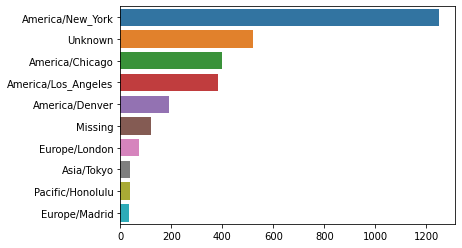

In [51]:
#여기서 seaborn 패키지를 이용해서 수평막대바 그래프를 그려보자.

import seaborn as sns
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)

In [52]:
frame['a'][1]

#a 필드에는 url 단축을 실행하는 브라우저 단말기 애플리케이션에 대한 정보가 들어있다.


'GoogleMaps/RochesterNY'

In [53]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [54]:
frame['a'][51][:50]


#"aqent" 어떤 흥미로운 문자열 정보를 분석하는 일이 어려워 보일 수 있다.

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [58]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [60]:
results.value_counts()[:8]

#이제 표준시간대 순위표를 윈도우 사용자와 비 윈도우 사용자 그룹으로 나눠보자 
# 단순화해서 agent 문자열에 Windows 포함하면 윈도우 사용자라고 가정하자 값이 없으면 제외하자

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [61]:
cframe = frame[frame.a.notnull()]

cframe['os'] = np.where(cframe['a'].str.contains('Windows'),
                        'Windows', 'Not Windows')
cframe['os'][:5]


#그런 다음 표준시간대와 운영체제를 기준으로 데이터를 그룹으로 묶는다.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [64]:
by_tz_os = cframe.groupby(['tz', 'os'])

In [65]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [66]:
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [67]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [68]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [70]:
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


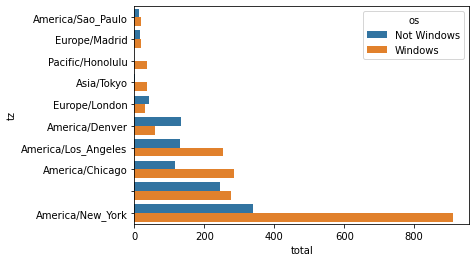

In [71]:
sns.barplot(x='total',y='tz',hue='os', data=count_subset)

In [72]:
pd.options.display.max_rows = 10

unames = [ 'user_id', 'gender', 'age' , 'occupation','zip']
users = pd.read_table('users.dat' , sep='::',
                      header=None, names=unames)

/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:765: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


In [73]:
rnames =['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat',sep='::',header=None, names=rnames)


/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:765: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


In [74]:
mnames = ['movie_id','title','genres']
movies = pd.read_table('movies.dat',sep='::', header=None, names=mnames)

/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:765: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


In [75]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [76]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5.0,978300760.0
1,1,661,3.0,978302109.0
2,1,914,3.0,978301968.0
3,1,3408,4.0,978300275.0
4,1,2355,5.0,978824291.0


In [77]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [78]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5.0,978300760.0
1,1,661,3.0,978302109.0
2,1,914,3.0,978301968.0
3,1,3408,4.0,978300275.0
4,1,2355,5.0,978824291.0
...,...,...,...,...
472546,2907,2889,3.0,972180282.0
472547,2907,473,2.0,972182730.0
472548,2907,2890,4.0,971838792.0
472549,2907,2891,2.0,971838422.0


In [79]:
#나이와 직업 실제 나이값이 아니라 그룹을 가리키는코드 번호이며 데이터 셋에 있는 readme파일에 정보가 들어가 있다 
#세종류의 테이블에 걸쳐있는 데이터를 분석하는 일은 단순한 일이 아니다.
# 모든 데이터를 하나의 테이블로 병합하면 아주 쉽게 처리할 수 있다.

#중복되는 두개의 테이블에서 중복되는 컬럼을 키로 사용한다. 


In [80]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5.0,978300760.0,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5.0,978298413.0,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4.0,978220179.0,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4.0,978199279.0,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5.0,978158471.0,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
472546,2665,3533,1.0,974836472.0,M,35,11,98443,"Actor's Revenge, An (Yukinojo Henge) (1963)",Drama
472547,2753,3533,3.0,973894942.0,F,50,20,27516,"Actor's Revenge, An (Yukinojo Henge) (1963)",Drama
472548,2796,1851,4.0,997320494.0,M,25,14,92104,Leather Jacket Love Story (1997),Drama|Romance
472549,2869,1830,5.0,972439040.0,M,50,17,07650,Follow the Bitch (1998),Comedy


In [81]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                9.78301e+08
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [83]:
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",4.000000,2.692308
'Night Mother (1986),3.500000,3.428571
'Til There Was You (1997),2.650000,2.555556
"'burbs, The (1989)",2.690476,2.907216
...And Justice for All (1979),3.625000,3.630769


In [84]:
# 어떻게 하면 매 로우마다 성ㅁ별에 따른 평균 영화 평점 정보를 담고 있는 DataFrame객체가 생성된다
# 250건 이상의 평점 정보가 있는 영화만 추려보자 

#데이터를 영화 제목으로 그룹화 하고 size()를 이용해서 제목별 평점 정보 건수를 Series로 구하자. 


In [85]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]


title
$1,000,000 Duck (1971)                20
'Night Mother (1986)                  26
'Til There Was You (1997)             29
'burbs, The (1989)                   139
...And Justice for All (1979)         81
10 Things I Hate About You (1999)    355
101 Dalmatians (1961)                266
101 Dalmatians (1996)                166
12 Angry Men (1957)                  303
13th Warrior, The (1999)             342
dtype: int64

In [86]:

active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index(['10 Things I Hate About You (1999)', '101 Dalmatians (1961)',
       '12 Angry Men (1957)', '13th Warrior, The (1999)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '28 Days (2000)', 'Abyss, The (1989)',
       'Ace Ventura: Pet Detective (1994)', 'Addams Family, The (1991)',
       ...
       'Willy Wonka and the Chocolate Factory (1971)', 'Witness (1985)',
       'Wizard of Oz, The (1939)', 'Wonder Boys (2000)',
       'World Is Not Enough, The (1999)', 'Wrong Trousers, The (1993)',
       'X-Files: Fight the Future, The (1998)', 'X-Men (2000)',
       'You've Got Mail (1998)', 'Young Frankenstein (1974)'],
      dtype='object', name='title', length=588)

In [87]:
#250개 이상의 평점 정보가 있는 영화에 대한 색인은 mean_ratings에서 항목을 선택하기 위해 사용할 수 있다. 

In [89]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
10 Things I Hate About You (1999),3.508772,3.298755
101 Dalmatians (1961),3.655172,3.441341
12 Angry Men (1957),4.194030,4.355932
"13th Warrior, The (1999)",3.061224,3.143345
"20,000 Leagues Under the Sea (1954)",3.804348,3.730088
...,...,...
"Wrong Trousers, The (1993)",4.558824,4.521036
"X-Files: Fight the Future, The (1998)",3.402597,3.460560
X-Men (2000),3.579310,3.804949


In [91]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Usual Suspects, The (1995)",4.613095,4.477918
"Close Shave, A (1995)",4.561644,4.454545
"Wrong Trousers, The (1993)",4.558824,4.521036
Schindler's List (1993),4.554770,4.501174
"Sixth Sense, The (1999)",4.522059,4.357591
"Shawshank Redemption, The (1994)",4.514599,4.538760
To Kill a Mockingbird (1962),4.492537,4.429967
Some Like It Hot (1959),4.458716,4.188811
Life Is Beautiful (La Vita � bella) (1997),4.447059,4.277228
